# Basketball Analytics: Big West Conference Guard Analysis

This notebook analyzes basketball statistics for guards in the Big West Division 1 basketball conference, focusing on:
- True Shooting Percentage (TS%)
- Usage Percentage (USG%)
- Team comparisons and player performance

## Data Overview
The dataset contains player statistics including shooting efficiency and usage rates for college basketball players.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the basketball data
# Update the file path to your CSV file location
data_path = "/Users/yashwant/Downloads/cbb-data-1758386177346.csv"

try:
    df = pd.read_csv(data_path)
    print(f"Data loaded successfully! Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
except FileNotFoundError:
    print("CSV file not found. Please update the data_path variable with the correct file location.")
    df = None

Data loaded successfully! Shape: (133, 984)
Columns: ['_id', 'competitionId', 'gender', 'teamId', 'playerId', 'scope', 'tournamentId', 'fullName', 'jerseyNum', 'height', 'position', 'classYr', 'isDraftProspect', 'hasImage', 'teamMarket', 'teamName', 'conferenceId', 'divisionId', 'isLatest', 'nextTeamId', 'nextTeamMarket', 'nextConferenceId', 'nextCompetitionId', 'priorTeamId', 'priorTeamMarket', 'priorConferenceId', 'priorCompetitionId', 'isTransfer', 'willTransfer', 'inPortal', 'updated', 'ptsScored', 'ptsCreated', 'nbaFgm3', 'nbaFga3', 'ast', 'ast3', 'ast2', 'fga', 'fga2', 'fga3', 'fgm', 'fgm2', 'fgm3', 'astdPts', 'ptsAstd', 'rim3sFgmA', 'rim3sFgmU', 'rim3sAst', 'lane2FgmA', 'lane2FgmU', 'lane2Ast', 'fgaS01', 'fgmS01', 'fgaS12', 'fgmS12', 'fgaS23', 'fgmS23', 'fga2S01', 'fgm2S01', 'fga2S12', 'fgm2S12', 'fga2S23', 'fgm2S23', 'fga3S01', 'fgm3S01', 'fga3S12', 'fgm3S12', 'fga3S23', 'fgm3S23', 'fgmA', 'fgm2A', 'fgm3A', 'dunkFgmA', 'fgmU', 'fgm2U', 'fgm3U', 'dunkFgmU', 'ftm', 'fta', 'ftm1',

In [3]:
# Examine the data structure
if df is not None:
    print("First few rows:")
    display(df.head())
    
    print("\nData types:")
    print(df.dtypes)
    
    print("\nBasic statistics:")
    display(df.describe())

First few rows:


,_id,competitionId,gender,teamId,playerId,scope,tournamentId,fullName,jerseyNum,height,position,classYr,isDraftProspect,hasImage,teamMarket,teamName,conferenceId,divisionId,isLatest,nextTeamId,nextTeamMarket,nextConferenceId,nextCompetitionId,priorTeamId,priorTeamMarket,priorConferenceId,priorCompetitionId,isTransfer,willTransfer,inPortal,updated,ptsScored,ptsCreated,nbaFgm3,nbaFga3,ast,ast3,ast2,fga,fga2,fga3,fgm,fgm2,fgm3,astdPts,ptsAstd,rim3sFgmA,rim3sFgmU,rim3sAst,lane2FgmA,lane2FgmU,lane2Ast,fgaS01,fgmS01,fgaS12,fgmS12,fgaS23,fgmS23,fga2S01,fgm2S01,fga2S12,fgm2S12,fga2S23,fgm2S23,fga3S01,fgm3S01,fga3S12,fgm3S12,fga3S23,fgm3S23,fgmA,fgm2A,fgm3A,dunkFgmA,fgmU,fgm2U,fgm3U,dunkFgmU,ftm,fta,ftm1,fta1,ftm2,fta2,ftm3,fta3,ftm1a1,fta1a1,orbFg,orbFt,drbFg,drbFt,orbFgChnc,orbFtChnc,drbFgChnc,drbFtChnc,shotAtt,shotAtt2P,shotAtt3P,pf,opf,sfl,pfd,opfd,sflDrawn,sfl2Drawn,sfl3Drawn,and1,and1on3s,sfl2Pts,sfl3Pts,sflAnd1,fflDrawn,stl,stl2,stl3,blk,blk2,blk3,tov,minsTm,minsTmBy5,fgaTm,ftaTm,tovTm,astTm,ptsScoredTm,fgaHc,fgmHc,fga2Hc,fgm2Hc,fga3Hc,fgm3Hc,fgaTr,fgmTr,fga2Tr,fgm2Tr,fga3Tr,fgm3Tr,fgaPb,fgmPb,layupDunkFga,layupDunkFgm,dunkFga,dunkFgm,dunkAst,aoopFga,aoopFgm,aoopAst,layupFga,layupFgm,rim3sFgm,rim3sFga,lane2Fgm,lane2Fga,atr2Fgm,atr2Fga,paint2Fgm,paint2Fga,mid2Fgm,mid2Fga,c3Fgm,c3Fga,atb3Fgm,atb3Fga,lb2Fgm,lb2Fga,rb2Fgm,rb2Fga,le2Fgm,le2Fga,re2Fgm,re2Fga,lc3Fgm,lc3Fga,rc3Fgm,rc3Fga,lw3Fgm,lw3Fga,rw3Fgm,rw3Fga,tok3Fgm,tok3Fga,heave3Fgm,heave3Fga,behindHoopFgm,behindHoopFga,slp2Fgm,slp2Fga,srp2Fgm,srp2Fga,flp2Fgm,flp2Fga,frp2Fgm,frp2Fga,sht2Fgm,sht2Fga,med2Fgm,med2Fga,lng2Fgm,lng2Fga,sht3Fgm,sht3Fga,lng3Fgm,lng3Fga,atr2Ast,paint2Ast,mid2Ast,c3Ast,atb3Ast,atr2FgmA,paint2FgmA,mid2FgmA,c3FgmA,atb3FgmA,atr2FgmU,paint2FgmU,mid2FgmU,c3FgmU,atb3FgmU,atr2FgaS01,paint2FgaS01,mid2FgaS01,c3FgaS01,atb3FgaS01,atr2FgmS01,paint2FgmS01,mid2FgmS01,c3FgmS01,atb3FgmS01,atr2FgaS12,paint2FgaS12,mid2FgaS12,c3FgaS12,atb3FgaS12,atr2FgmS12,paint2FgmS12,mid2FgmS12,c3FgmS12,atb3FgmS12,atr2FgaS23,paint2FgaS23,mid2FgaS23,c3FgaS23,atb3FgaS23,atr2FgmS23,paint2FgmS23,mid2FgmS23,c3FgmS23,atb3FgmS23,gp,gsPbp,gpPbp,minsPbp,possPbp,fgPct,fg2Pct,fg3Pct,efgPct,fga3Rate,goodTakeRate,nbaFg3Pct,nba3FgaFreq,nba3FgaFreq3s,rim3sFgPct,rim3sFgaFreq,rim3sFgaPg,rim3sFgaP40,lane2FgPct,lane2FgaFreq,lane2FgaPg,lane2FgaP40,atr2FgPct,atr2FgaFreq,atr2FgaPg,atr2FgaP40,paint2FgPct,paint2FgaFreq,paint2FgaPg,paint2FgaP40,mid2FgPct,mid2FgaFreq,mid2FgaPg,mid2FgaP40,c3FgPct,c3FgaFreq,c3FgaPg,c3FgaP40,atb3FgPct,atb3FgaFreq,atb3FgaPg,atb3FgaP40,lb2FgPct,lb2FgaFreq,lb2FgaPg,lb2FgaP40,rb2FgPct,rb2FgaFreq,rb2FgaPg,rb2FgaP40,le2FgPct,le2FgaFreq,le2FgaPg,le2FgaP40,re2FgPct,re2FgaFreq,re2FgaPg,re2FgaP40,lc3FgPct,lc3FgaFreq,lc3FgaPg,lc3FgaP40,rc3FgPct,rc3FgaFreq,rc3FgaPg,rc3FgaP40,lw3FgPct,lw3FgaFreq,lw3FgaPg,lw3FgaP40,rw3FgPct,rw3FgaFreq,rw3FgaPg,rw3FgaP40,tok3FgPct,tok3FgaFreq,tok3FgaPg,tok3FgaP40,heave3FgPct,heave3FgaFreq,heave3FgaPg,heave3FgaP40,behindHoopFgPct,behindHoopFgaFreq,behindHoopFgaPg,behindHoopFgaP40,slp2FgPct,slp2FgaFreq,slp2FgaPg,slp2FgaP40,srp2FgPct,srp2FgaFreq,srp2FgaPg,srp2FgaP40,flp2FgPct,flp2FgaFreq,flp2FgaPg,flp2FgaP40,frp2FgPct,frp2FgaFreq,frp2FgaPg,frp2FgaP40,sht2FgPct,sht2FgaFreq,sht2FgaPg,sht2FgaP40,med2FgPct,med2FgaFreq,med2FgaPg,med2FgaP40,lng2FgPct,lng2FgaFreq,lng2FgaPg,lng2FgaP40,sht3FgPct,sht3FgaFreq,sht3FgaPg,sht3FgaP40,lng3FgPct,lng3FgaFreq,lng3FgaPg,lng3FgaP40,rim3sEfgPct,atr2FgPctS01,atr2FgPctS12,atr2FgPctS23,atr2FgaFreqAllS01,atr2FgaFreqZoneS01,atr2FgaFreqClockS01,atr2FgaFreqAllS12,atr2FgaFreqZoneS12,atr2FgaFreqClockS12,atr2FgaFreqAllS23,atr2FgaFreqZoneS23,atr2FgaFreqClockS23,paint2FgPctS01,paint2FgPctS12,paint2FgPctS23,paint2FgaFreqAllS01,paint2FgaFreqZoneS01,paint2FgaFreqClockS01,paint2FgaFreqAllS12,paint2FgaFreqZoneS12,paint2FgaFreqClockS12,paint2FgaFreqAllS23,paint2FgaFreqZoneS23,paint2FgaFreqClockS23,mid2FgPctS01,mid2FgPctS12,mid2FgPctS23,mid2FgaFreqAllS01,mid2FgaFreqZoneS01,mid2FgaFreqClockS01,mid2FgaFreqAllS12,mid2FgaFreqZoneS12,mid2FgaFreqClockS12,mid2FgaFr


Data types:
_id                    object
competitionId           int64
gender                 object
teamId                  int64
playerId                int64
                       ...   
c3AstdPctPctile       float64
rim3sAstdPctPctile    float64
lane2AstdPctPctile    float64
ptsAstdPctPctile      float64
dunkAstdPctPctile     float64
Length: 984, dtype: object

Basic statistics:


competitionId         teamId      playerId  tournamentId   jerseyNum  \
count          133.0     133.000000  1.330000e+02         133.0  133.000000   
mean         38409.0  103885.819549  1.908248e+06           0.0   13.203008   
std              0.0     439.995262  2.918706e+05           0.0   12.419901   
min          38409.0  103389.000000  1.300608e+06           0.0    0.000000   
25%          38409.0  103395.000000  1.689896e+06           0.0    4.000000   
50%          38409.0  103825.000000  1.912498e+06           0.0   10.000000   
75%          38409.0  104354.000000  2.122807e+06           0.0   21.000000   
max          38409.0  104356.000000  2.349248e+06           0.0   77.000000   

           height  conferenceId  divisionId  nextTeamId  nextTeamMarket  \
count  133.000000         133.0       133.0         0.0             0.0   
mean    77.503759          40.0         1.0         NaN             NaN   
std      3.054118           0.0         0.0         NaN             NaN   
min     70.000000          40.0         1.0         NaN             NaN   
25%     75.000000          40.0         1.0         NaN             NaN   
50%     77.000000          40.0         1.0         NaN             NaN   
75%     80.000000          40.0         1.0         NaN             NaN   
max     85.000000          40.0         1.0         NaN             NaN   

       nextConferenceId  nextCompetitionId    priorTeamId  priorConferenceId  \
count               0.0                0.0     105.000000         105.000000   
mean                NaN                NaN  103927.333333          42.990476   
std                 NaN                NaN     427.908322          16.925456   
min                 NaN                NaN  103320.000000           1.000000   
25%                 NaN                NaN  103405.000000          40.000000   
50%                 NaN                NaN  104067.000000          40.000000   
75%                 NaN                NaN  104353.000000          40.000000   
max                 NaN                NaN  104509.000000         100.000000   

       priorCompetitionId   ptsScored  ptsCreated     nbaFgm3     nbaFga3  \
count               133.0  133.000000  133.000000  133.000000  133.000000   
mean              36046.0  191.067669  275.864662   18.082707   51.902256   
std                   0.0  167.098827  241.823902   21.443034   56.571337   
min               36046.0    2.000000    4.000000    0.000000    0.000000   
25%               36046.0   53.000000   66.000000    2.000000    7.000000   
50%               36046.0  158.000000  211.000000   10.000000   28.000000   
75%               36046.0  299.000000  431.000000   28.000000   79.000000   
max               36046.0  656.000000  986.000000   96.000000  259.000000   

              ast        ast3        ast2         fga        fga2        fga3  \
count  133.000000  133.000000  133.000000  133.000000  133.000000  133.000000   
mean    33.954887   16.887218   17.067669  149.842105   91.120301   58.721805   
std     34.802879   18.420038   18.177240  128.241890   86.254384   63.638462   
min      0.000000    0.000000    0.000000    4.000000    0.000000    0.000000   
25%      8.000000    4.000000    4.000000   48.000000   22.000000    8.000000   
50%     20.000000   10.000000   10.000000  118.000000   68.000000   31.000000   
75%     45.000000   23.000000   24.000000  227.000000  132.000000   91.000000   
max    142.000000   83.000000   81.000000  564.000000  433.000000  292.000000   

              fgm        fgm2        fgm3     astdPts     ptsAstd   rim3sFgmA  \
count  133.000000  133.000000  133.000000  133.000000  133.000000  133.000000   
mean    66.015038   45.624060   20.390977   84.676692   84.796992   27.977444   
std     57.845403   44.455392   23.755648   70.900330   87.318449   23.398545   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     18.000000   12.000000    2.000000   26.000000   17.000000    

## Data Processing and Filtering

Let's identify the relevant columns for our analysis and filter for guards in the Big West conference.

In [4]:
# Let's examine the column names to identify relevant fields
if df is not None:
    print("Column names in the dataset:")
    for i, col in enumerate(df.columns):
        print(f"{i}: {col}")
        
    # Look for key columns we need
    print("\nLooking for key basketball statistics columns...")
    
    # Common basketball stat abbreviations to look for
    key_terms = ['name', 'team', 'position', 'ts', 'usg', 'usage', 'shooting', 'true']
    
    relevant_cols = []
    for col in df.columns:
        if any(term in col.lower() for term in key_terms):
            relevant_cols.append(col)
    
    print(f"Potentially relevant columns: {relevant_cols}")

Column names in the dataset:
0: _id
1: competitionId
2: gender
3: teamId
4: playerId
5: scope
6: tournamentId
7: fullName
8: jerseyNum
9: height
10: position
11: classYr
12: isDraftProspect
13: hasImage
14: teamMarket
15: teamName
16: conferenceId
17: divisionId
18: isLatest
19: nextTeamId
20: nextTeamMarket
21: nextConferenceId
22: nextCompetitionId
23: priorTeamId
24: priorTeamMarket
25: priorConferenceId
26: priorCompetitionId
27: isTransfer
28: willTransfer
29: inPortal
30: updated
31: ptsScored
32: ptsCreated
33: nbaFgm3
34: nbaFga3
35: ast
36: ast3
37: ast2
38: fga
39: fga2
40: fga3
41: fgm
42: fgm2
43: fgm3
44: astdPts
45: ptsAstd
46: rim3sFgmA
47: rim3sFgmU
48: rim3sAst
49: lane2FgmA
50: lane2FgmU
51: lane2Ast
52: fgaS01
53: fgmS01
54: fgaS12
55: fgmS12
56: fgaS23
57: fgmS23
58: fga2S01
59: fgm2S01
60: fga2S12
61: fgm2S12
62: fga2S23
63: fgm2S23
64: fga3S01
65: fgm3S01
66: fga3S12
67: fgm3S12
68: fga3S23
69: fgm3S23
70: fgmA
71: fgm2A
72: fgm3A
73: dunkFgmA
74: fgmU
75: fgm2U
7

In [5]:
# Based on typical basketball data structure, let's try to identify the correct columns
# This is a sample - you may need to adjust based on your actual column names

if df is not None:
    # Try to identify player name, team, and position columns
    possible_name_cols = [col for col in df.columns if 'name' in col.lower()]
    possible_team_cols = [col for col in df.columns if any(term in col.lower() for term in ['team', 'school'])]
    possible_position_cols = [col for col in df.columns if any(term in col.lower() for term in ['pos', 'position'])]
    
    print(f"Possible name columns: {possible_name_cols}")
    print(f"Possible team columns: {possible_team_cols}")
    print(f"Possible position columns: {possible_position_cols}")
    
    # Sample the first row to understand the data structure
    print("\nFirst row values:")
    print(df.iloc[0].to_string())

Possible name columns: ['tournamentId', 'fullName', 'teamName']
Possible team columns: ['teamId', 'teamMarket', 'teamName', 'nextTeamId', 'nextTeamMarket', 'priorTeamId', 'priorTeamMarket', 'pctOfTeamAst', 'pctOfTeamFga', 'pctOfTeamFta', 'pctOfTeamTov', 'pctOfTeamAstPctile', 'pctOfTeamFgaPctile', 'pctOfTeamFtaPctile', 'pctOfTeamTovPctile']
Possible position columns: ['position', 'possPbp']

First row values:
_id                                                38409-season-104352-1687786-0
competitionId                                                              38409
gender                                                                      MALE
teamId                                                                    104352
playerId                                                                 1687786
scope                                                                     season
tournamentId                                                                   0
fullName             

## Cal Poly Players Sample

Let's identify Cal Poly players and examine their True Shooting Percentage and Usage Percentage.

In [ ]:
# Filter for Cal Poly players
# This assumes there's a team/school column - adjust based on your data structure

if df is not None:
    # Look for Cal Poly in team-related columns
    cal_poly_keywords = ['cal poly', 'california polytechnic', 'mustangs']
    
    # Try to find Cal Poly players
    cal_poly_mask = pd.Series([False] * len(df))
    
    for col in df.columns:
        if df[col].dtype == 'object':  # Only check string columns
            for keyword in cal_poly_keywords:
                mask = df[col].astype(str).str.contains(keyword, case=False, na=False)
                cal_poly_mask = cal_poly_mask | mask
    
    cal_poly_players = df[cal_poly_mask]
    
    if len(cal_poly_players) > 0:
        print(f"Found {len(cal_poly_players)} Cal Poly players:")
        display(cal_poly_players.head())
    else:
        print("No Cal Poly players found with the keywords searched.")
        print("Let's examine unique team names to find the correct identifier:")
        
        # Look for team column and show unique values
        for col in df.columns:
            if 'team' in col.lower() or 'school' in col.lower():
                unique_values = df[col].unique()
                print(f"\nUnique values in {col}:")
                print(unique_values[:20])  # Show first 20 values

In [6]:
# Extract Cal Poly player data directly
# Based on the data structure, let's identify the key columns we need

# Key columns we need:
# - fullName: player name
# - teamMarket: team market (should contain "Cal Poly")
# - teamName: team name 
# - position: player position
# - tsPct: True Shooting Percentage
# - usagePct: Usage Percentage

# Filter for Cal Poly players
cal_poly_mask = (df['teamMarket'].str.contains('Cal Poly', case=False, na=False)) | \
                (df['teamName'].str.contains('Cal Poly', case=False, na=False))

cal_poly_players = df[cal_poly_mask]

print(f"Found {len(cal_poly_players)} Cal Poly players")

if len(cal_poly_players) > 0:
    # Select key columns for analysis
    key_cols = ['fullName', 'teamMarket', 'teamName', 'position', 'classYr', 'tsPct', 'usagePct', 'gp']
    cal_poly_sample = cal_poly_players[key_cols].copy()
    
    # Sort by True Shooting Percentage (descending)
    cal_poly_sample = cal_poly_sample.sort_values('tsPct', ascending=False)
    
    print("\nCal Poly Players - True Shooting % and Usage % Analysis:")
    print("=" * 80)
    
    for idx, player in cal_poly_sample.iterrows():
        name = player['fullName']
        position = player['position']
        year = player['classYr']
        ts_pct = player['tsPct']
        usage_pct = player['usagePct']
        games = player['gp']
        
        # Convert to percentages if they're in decimal form
        if ts_pct <= 1.0:
            ts_display = f"{ts_pct * 100:.1f}%"
        else:
            ts_display = f"{ts_pct:.1f}%"
            
        if usage_pct <= 1.0:
            usage_display = f"{usage_pct * 100:.1f}%"
        else:
            usage_display = f"{usage_pct:.1f}%"
        
        print(f"{name:<25} | {position:<3} | {year:<10} | TS%: {ts_display:<6} | USG%: {usage_display:<6} | GP: {games}")
    
    # Show summary statistics
    print(f"\nTeam Summary:")
    print(f"Average True Shooting %: {cal_poly_sample['tsPct'].mean():.1f}%")
    print(f"Average Usage %: {cal_poly_sample['usagePct'].mean():.1f}%")
    print(f"Number of guards: {len(cal_poly_sample[cal_poly_sample['position'] == 'G'])}")
    
else:
    # Let's examine what team names are available
    print("No Cal Poly players found. Let's check available team names:")
    unique_teams = df[['teamMarket', 'teamName']].drop_duplicates()
    print(unique_teams.head(20))

Found 14 Cal Poly players

Cal Poly Players - True Shooting % and Usage % Analysis:
Owen Koonce               | G   | Senior     | TS%: 64.5%  | USG%: 24.9%  | GP: 34
Isaac Jessup              | G   | Senior     | TS%: 64.0%  | USG%: 16.4%  | GP: 31
Peter Bandelj             | G   | Freshman   | TS%: 60.8%  | USG%: 18.1%  | GP: 34
Aaron Price, Jr.          | F   | Junior     | TS%: 60.2%  | USG%: 20.1%  | GP: 30
Mac Riniker               | G   | Senior     | TS%: 58.7%  | USG%: 20.3%  | GP: 34
Guzman Vasilic            | G   | Freshman   | TS%: 58.1%  | USG%: 15.1%  | GP: 29
Luka Tarlac               | G   | Junior     | TS%: 54.0%  | USG%: 15.4%  | GP: 27
Jarred Hyder              | G   | Senior     | TS%: 53.9%  | USG%: 23.1%  | GP: 32
Cayden Ward               | G   | Freshman   | TS%: 53.3%  | USG%: 24.7%  | GP: 23
Ethan Menzies             | F   | Senior     | TS%: 53.0%  | USG%: 14.9%  | GP: 25
Kieran Elliott            | G   | Sophomore  | TS%: 51.9%  | USG%: 20.0%  | GP: 10
Hay

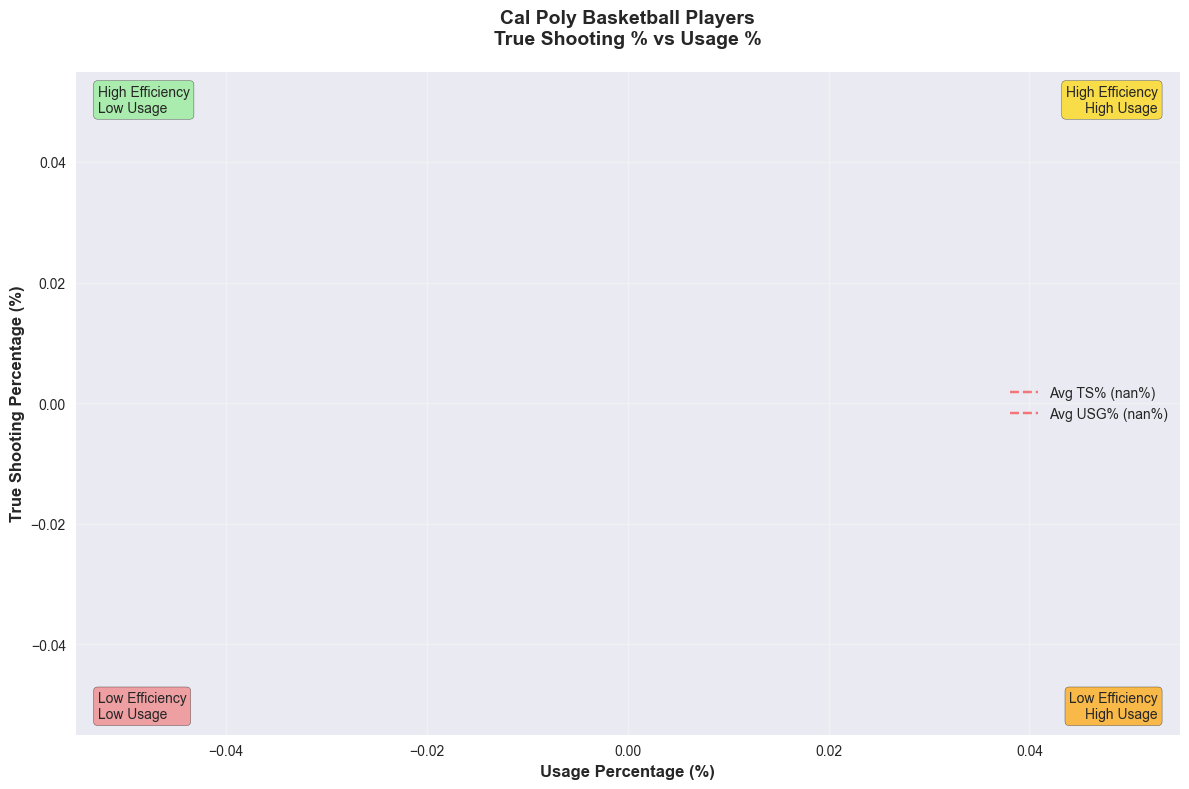


Cal Poly Guards Analysis (n=0):
Player               Year       TS%      USG%     GP  
------------------------------------------------------------

Guards Team Averages:
True Shooting %: nan%
Usage %: nan%


In [7]:
# Create visualization for Cal Poly players - True Shooting % vs Usage %
plt.figure(figsize=(12, 8))

# Filter out players with very low True Shooting % (likely outliers with few games)
cal_poly_viz = cal_poly_sample[cal_poly_sample['tsPct'] > 30].copy()

# Create scatter plot
scatter = plt.scatter(cal_poly_viz['usagePct'], cal_poly_viz['tsPct'], 
                     s=100, alpha=0.7, c='navy', edgecolors='gold', linewidth=2)

# Add player names as labels
for idx, player in cal_poly_viz.iterrows():
    plt.annotate(player['fullName'], 
                (player['usagePct'], player['tsPct']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, ha='left')

# Add quadrant lines for analysis
plt.axhline(y=cal_poly_viz['tsPct'].mean(), color='red', linestyle='--', alpha=0.5, label=f"Avg TS% ({cal_poly_viz['tsPct'].mean():.1f}%)")
plt.axvline(x=cal_poly_viz['usagePct'].mean(), color='red', linestyle='--', alpha=0.5, label=f"Avg USG% ({cal_poly_viz['usagePct'].mean():.1f}%)")

# Formatting
plt.xlabel('Usage Percentage (%)', fontsize=12, fontweight='bold')
plt.ylabel('True Shooting Percentage (%)', fontsize=12, fontweight='bold')
plt.title('Cal Poly Basketball Players\nTrue Shooting % vs Usage %', fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)
plt.legend()

# Add quadrant labels
plt.text(0.02, 0.98, 'High Efficiency\nLow Usage', transform=plt.gca().transAxes, 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7),
         verticalalignment='top')
plt.text(0.98, 0.98, 'High Efficiency\nHigh Usage', transform=plt.gca().transAxes, 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="gold", alpha=0.7),
         verticalalignment='top', horizontalalignment='right')
plt.text(0.02, 0.02, 'Low Efficiency\nLow Usage', transform=plt.gca().transAxes, 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7),
         verticalalignment='bottom')
plt.text(0.98, 0.02, 'Low Efficiency\nHigh Usage', transform=plt.gca().transAxes, 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="orange", alpha=0.7),
         verticalalignment='bottom', horizontalalignment='right')

plt.tight_layout()
plt.show()

# Create a summary table for guards only
guards_only = cal_poly_viz[cal_poly_viz['position'] == 'G'].copy()
print(f"\nCal Poly Guards Analysis (n={len(guards_only)}):")
print("=" * 60)
print(f"{'Player':<20} {'Year':<10} {'TS%':<8} {'USG%':<8} {'GP':<4}")
print("-" * 60)

for idx, player in guards_only.sort_values('tsPct', ascending=False).iterrows():
    print(f"{player['fullName']:<20} {player['classYr']:<10} {player['tsPct']:.1f}%   {player['usagePct']:.1f}%   {player['gp']}")

print(f"\nGuards Team Averages:")
print(f"True Shooting %: {guards_only['tsPct'].mean():.1f}%")
print(f"Usage %: {guards_only['usagePct'].mean():.1f}%")

Corrected Cal Poly Players Data:
Player                    Pos Year       TS%      USG%     GP  
--------------------------------------------------------------------------------
Owen Koonce               G   Senior     64.5%   24.9%   34
Isaac Jessup              G   Senior     64.0%   16.4%   31
Peter Bandelj             G   Freshman   60.8%   18.1%   34
Aaron Price, Jr.          F   Junior     60.2%   20.1%   30
Mac Riniker               G   Senior     58.7%   20.3%   34
Guzman Vasilic            G   Freshman   58.1%   15.1%   29
Luka Tarlac               G   Junior     54.0%   15.4%   27
Jarred Hyder              G   Senior     53.9%   23.1%   32
Cayden Ward               G   Freshman   53.3%   24.7%   23
Ethan Menzies             F   Senior     53.0%   14.9%   25
Kieran Elliott            G   Sophomore  51.9%   20.0%   10
Hayden Jory               G   Senior     45.1%   10.9%   15
Logan McLaughlin          G   Junior     42.5%   23.4%   8


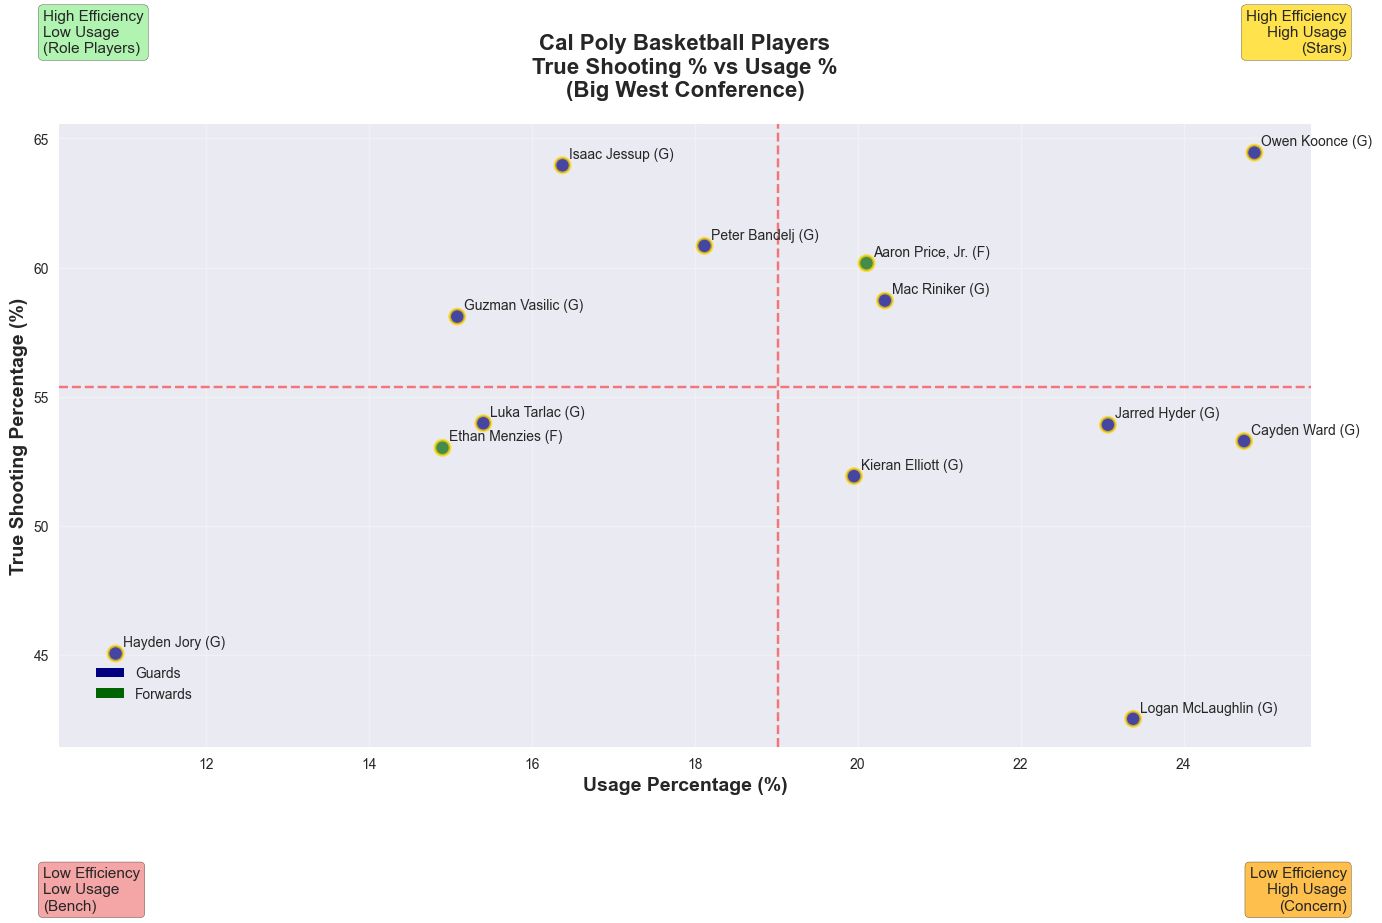


Cal Poly Team Summary (Players with >30% TS%):
Total Players: 13
Guards: 11
Forwards: 2
Average True Shooting %: 55.4%
Average Usage %: 19.0%

Guards-Only Analysis (n=11):
Average True Shooting %: 55.2%
Average Usage %: 19.3%
Best TS% Guard: Owen Koonce (64.5%)
Highest Usage Guard: Owen Koonce (24.9%)


In [8]:
# Fix the data scaling issue - convert from decimal to percentage format
cal_poly_corrected = cal_poly_sample.copy()

# Convert decimal format to percentage (multiply by 100 if values are < 1)
if cal_poly_corrected['tsPct'].max() <= 1.0:
    cal_poly_corrected['tsPct'] = cal_poly_corrected['tsPct'] * 100
if cal_poly_corrected['usagePct'].max() <= 1.0:
    cal_poly_corrected['usagePct'] = cal_poly_corrected['usagePct'] * 100

# Filter out players with very low True Shooting % (likely outliers)
cal_poly_viz = cal_poly_corrected[cal_poly_corrected['tsPct'] > 30].copy()

print(f"Corrected Cal Poly Players Data:")
print("=" * 80)
print(f"{'Player':<25} {'Pos':<3} {'Year':<10} {'TS%':<8} {'USG%':<8} {'GP':<4}")
print("-" * 80)

for idx, player in cal_poly_viz.sort_values('tsPct', ascending=False).iterrows():
    print(f"{player['fullName']:<25} {player['position']:<3} {player['classYr']:<10} {player['tsPct']:.1f}%   {player['usagePct']:.1f}%   {player['gp']}")

# Create visualization for Cal Poly players - True Shooting % vs Usage %
plt.figure(figsize=(14, 10))

# Different colors for positions
position_colors = {'G': 'navy', 'F': 'darkgreen', 'C': 'darkred'}
colors = [position_colors.get(pos, 'gray') for pos in cal_poly_viz['position']]

# Create scatter plot
scatter = plt.scatter(cal_poly_viz['usagePct'], cal_poly_viz['tsPct'], 
                     s=120, alpha=0.7, c=colors, edgecolors='gold', linewidth=2)

# Add player names as labels
for idx, player in cal_poly_viz.iterrows():
    plt.annotate(f"{player['fullName']} ({player['position']})", 
                (player['usagePct'], player['tsPct']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, ha='left')

# Add average lines
avg_ts = cal_poly_viz['tsPct'].mean()
avg_usage = cal_poly_viz['usagePct'].mean()
plt.axhline(y=avg_ts, color='red', linestyle='--', alpha=0.5, label=f"Avg TS% ({avg_ts:.1f}%)")
plt.axvline(x=avg_usage, color='red', linestyle='--', alpha=0.5, label=f"Avg USG% ({avg_usage:.1f}%)")

# Formatting
plt.xlabel('Usage Percentage (%)', fontsize=14, fontweight='bold')
plt.ylabel('True Shooting Percentage (%)', fontsize=14, fontweight='bold')
plt.title('Cal Poly Basketball Players\nTrue Shooting % vs Usage %\n(Big West Conference)', 
          fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)
plt.legend()

# Add quadrant labels
plt.text(10, 70, 'High Efficiency\nLow Usage\n(Role Players)', 
         fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7),
         verticalalignment='top')
plt.text(26, 70, 'High Efficiency\nHigh Usage\n(Stars)', 
         fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="gold", alpha=0.7),
         verticalalignment='top', horizontalalignment='right')
plt.text(10, 35, 'Low Efficiency\nLow Usage\n(Bench)', 
         fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7),
         verticalalignment='bottom')
plt.text(26, 35, 'Low Efficiency\nHigh Usage\n(Concern)', 
         fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="orange", alpha=0.7),
         verticalalignment='bottom', horizontalalignment='right')

# Add position legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='navy', label='Guards'),
                   Patch(facecolor='darkgreen', label='Forwards')]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.02, 0.15))

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nCal Poly Team Summary (Players with >30% TS%):")
print("=" * 60)
print(f"Total Players: {len(cal_poly_viz)}")
print(f"Guards: {len(cal_poly_viz[cal_poly_viz['position'] == 'G'])}")
print(f"Forwards: {len(cal_poly_viz[cal_poly_viz['position'] == 'F'])}")
print(f"Average True Shooting %: {avg_ts:.1f}%")
print(f"Average Usage %: {avg_usage:.1f}%")

# Guards only analysis
guards_only = cal_poly_viz[cal_poly_viz['position'] == 'G'].copy()
if len(guards_only) > 0:
    print(f"\nGuards-Only Analysis (n={len(guards_only)}):")
    print(f"Average True Shooting %: {guards_only['tsPct'].mean():.1f}%")
    print(f"Average Usage %: {guards_only['usagePct'].mean():.1f}%")
    print(f"Best TS% Guard: {guards_only.loc[guards_only['tsPct'].idxmax(), 'fullName']} ({guards_only['tsPct'].max():.1f}%)")
    print(f"Highest Usage Guard: {guards_only.loc[guards_only['usagePct'].idxmax(), 'fullName']} ({guards_only['usagePct'].max():.1f}%)")

Teams in the dataset:
       teamMarket         teamName
  CSU Bakersfield      Roadrunners
             CSUN         Matadors
         Cal Poly         Mustangs
Cal St. Fullerton           Titans
           Hawaii Rainbow Warriors
   Long Beach St.            Beach
         UC Davis           Aggies
        UC Irvine        Anteaters
     UC Riverside      Highlanders
     UC San Diego          Tritons
 UC Santa Barbara          Gauchos


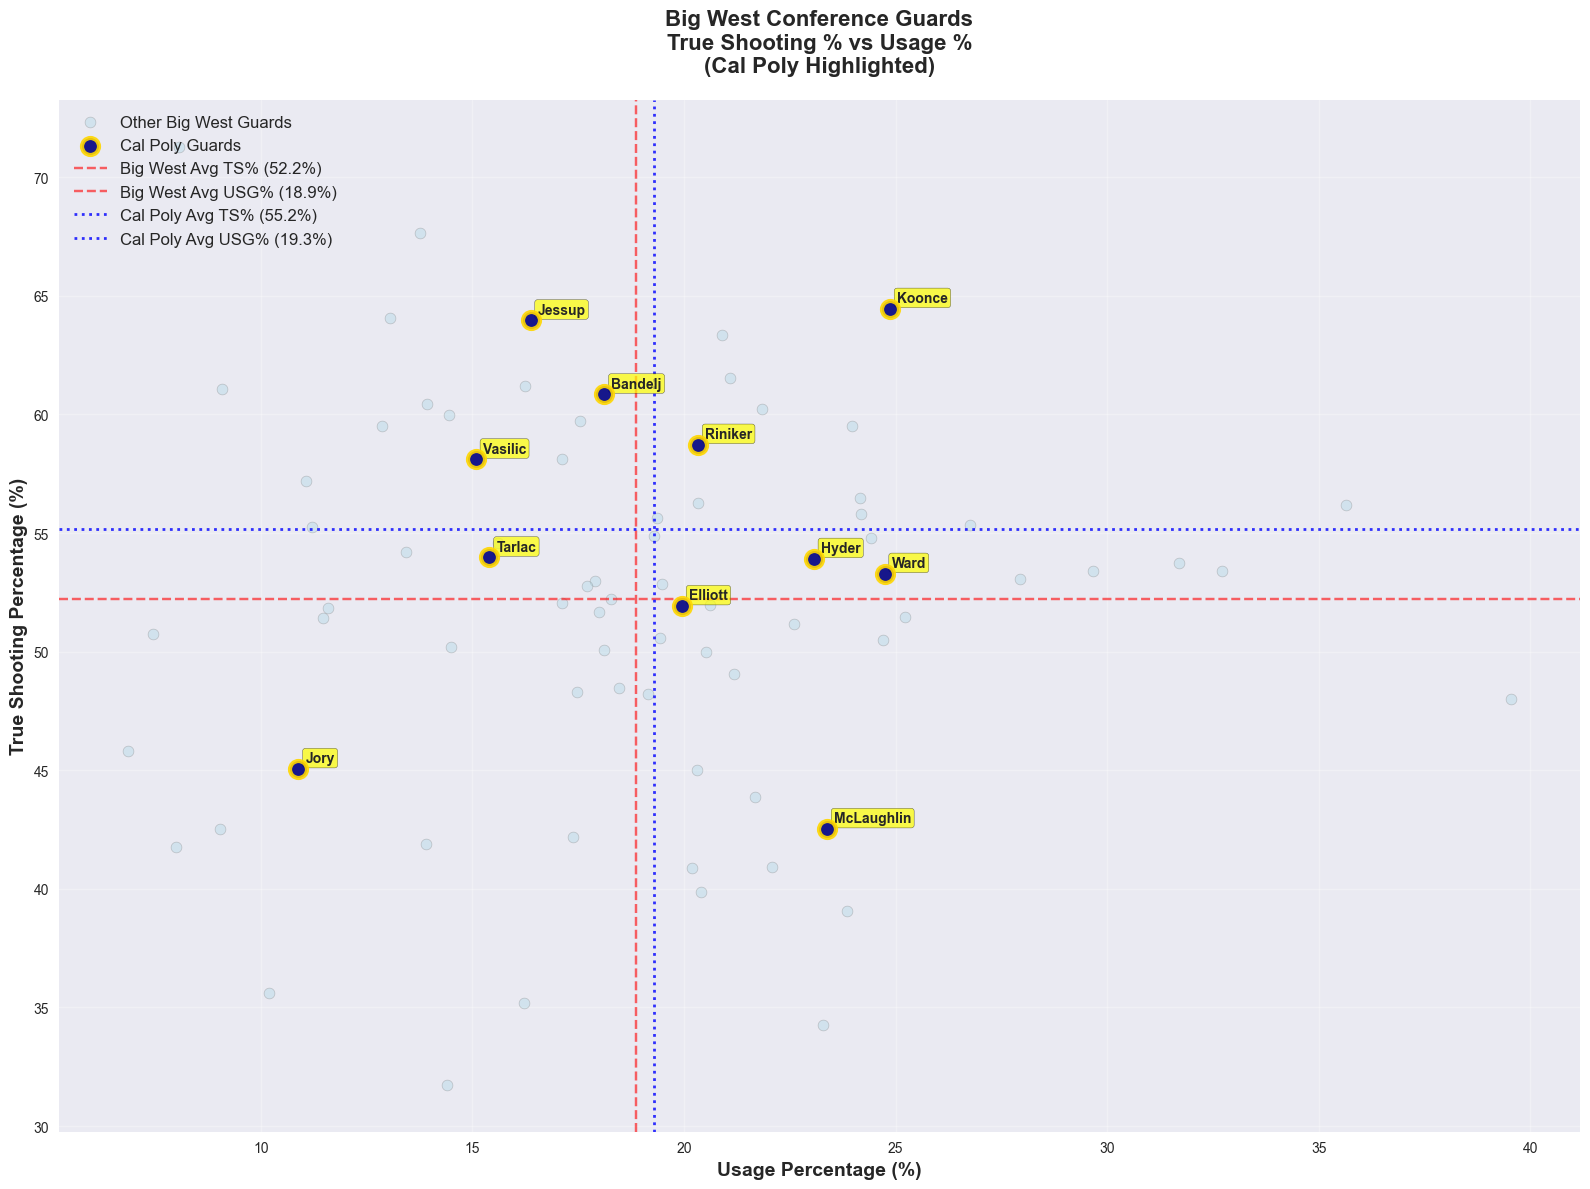


Big West Conference Guards Comparison:
Total Guards in Dataset: 78
Cal Poly Guards: 11

BIG WEST CONFERENCE AVERAGES:
True Shooting %: 52.2%
Usage %: 18.9%

CAL POLY AVERAGES:
True Shooting %: 55.2%
Usage %: 19.3%

CAL POLY vs BIG WEST:
TS% Difference: +3.0% (Above average)
Usage% Difference: +0.4% (Above average)

Top Cal Poly Guard Performers:
Owen Koonce: 64.5% TS, 24.9% Usage
Isaac Jessup: 64.0% TS, 16.4% Usage
Peter Bandelj: 60.8% TS, 18.1% Usage


In [9]:
# Create Big West Conference comparison
# First, let's see what teams are in our dataset
print("Teams in the dataset:")
teams_info = df[['teamMarket', 'teamName']].drop_duplicates().sort_values('teamMarket')
print(teams_info.to_string(index=False))

# Convert percentages for all players
df_viz = df.copy()
if df_viz['tsPct'].max() <= 1.0:
    df_viz['tsPct'] = df_viz['tsPct'] * 100
if df_viz['usagePct'].max() <= 1.0:
    df_viz['usagePct'] = df_viz['usagePct'] * 100

# Filter for guards only and reasonable TS% (>30%)
guards_all = df_viz[(df_viz['position'] == 'G') & (df_viz['tsPct'] > 30)].copy()

# Identify Cal Poly players
guards_all['is_cal_poly'] = guards_all['teamMarket'].str.contains('Cal Poly', case=False, na=False)

# Create Big West comparison visualization
plt.figure(figsize=(16, 12))

# Plot all guards
plt.scatter(guards_all[~guards_all['is_cal_poly']]['usagePct'], 
           guards_all[~guards_all['is_cal_poly']]['tsPct'], 
           s=60, alpha=0.4, c='lightblue', edgecolors='gray', linewidth=0.5, 
           label='Other Big West Guards')

# Plot Cal Poly guards with emphasis
cal_poly_guards = guards_all[guards_all['is_cal_poly']]
plt.scatter(cal_poly_guards['usagePct'], cal_poly_guards['tsPct'], 
           s=150, alpha=0.9, c='navy', edgecolors='gold', linewidth=3, 
           label='Cal Poly Guards', zorder=5)

# Add Cal Poly player names
for idx, player in cal_poly_guards.iterrows():
    plt.annotate(player['fullName'].split()[-1],  # Use last name only for cleaner labels
                (player['usagePct'], player['tsPct']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, ha='left', fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", facecolor="yellow", alpha=0.7))

# Add average lines for all guards
all_avg_ts = guards_all['tsPct'].mean()
all_avg_usage = guards_all['usagePct'].mean()
plt.axhline(y=all_avg_ts, color='red', linestyle='--', alpha=0.6, 
           label=f"Big West Avg TS% ({all_avg_ts:.1f}%)")
plt.axvline(x=all_avg_usage, color='red', linestyle='--', alpha=0.6, 
           label=f"Big West Avg USG% ({all_avg_usage:.1f}%)")

# Add Cal Poly average lines
cp_avg_ts = cal_poly_guards['tsPct'].mean()
cp_avg_usage = cal_poly_guards['usagePct'].mean()
plt.axhline(y=cp_avg_ts, color='blue', linestyle=':', alpha=0.8, linewidth=2,
           label=f"Cal Poly Avg TS% ({cp_avg_ts:.1f}%)")
plt.axvline(x=cp_avg_usage, color='blue', linestyle=':', alpha=0.8, linewidth=2,
           label=f"Cal Poly Avg USG% ({cp_avg_usage:.1f}%)")

# Formatting
plt.xlabel('Usage Percentage (%)', fontsize=14, fontweight='bold')
plt.ylabel('True Shooting Percentage (%)', fontsize=14, fontweight='bold')
plt.title('Big West Conference Guards\nTrue Shooting % vs Usage %\n(Cal Poly Highlighted)', 
          fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

# Statistical comparison
print(f"\nBig West Conference Guards Comparison:")
print("=" * 60)
print(f"Total Guards in Dataset: {len(guards_all)}")
print(f"Cal Poly Guards: {len(cal_poly_guards)}")
print(f"")
print(f"BIG WEST CONFERENCE AVERAGES:")
print(f"True Shooting %: {all_avg_ts:.1f}%")
print(f"Usage %: {all_avg_usage:.1f}%")
print(f"")
print(f"CAL POLY AVERAGES:")
print(f"True Shooting %: {cp_avg_ts:.1f}%")
print(f"Usage %: {cp_avg_usage:.1f}%")
print(f"")
print(f"CAL POLY vs BIG WEST:")
print(f"TS% Difference: {cp_avg_ts - all_avg_ts:+.1f}% ({'Above' if cp_avg_ts > all_avg_ts else 'Below'} average)")
print(f"Usage% Difference: {cp_avg_usage - all_avg_usage:+.1f}% ({'Above' if cp_avg_usage > all_avg_usage else 'Below'} average)")

# Top Cal Poly performers
print(f"\nTop Cal Poly Guard Performers:")
print("=" * 50)
top_guards = cal_poly_guards.nlargest(3, 'tsPct')
for idx, player in top_guards.iterrows():
    print(f"{player['fullName']}: {player['tsPct']:.1f}% TS, {player['usagePct']:.1f}% Usage")

In [ ]:
# Create sample data visualization functions
def plot_ts_vs_usage(data, title="True Shooting % vs Usage %"):
    """
    Create a scatter plot of True Shooting Percentage vs Usage Percentage
    """
    plt.figure(figsize=(10, 6))
    
    # This is a template - adjust column names based on your data
    # plt.scatter(data['usage_pct'], data['ts_pct'], alpha=0.7)
    # plt.xlabel('Usage Percentage')
    # plt.ylabel('True Shooting Percentage')
    # plt.title(title)
    # plt.grid(True, alpha=0.3)
    
    print("Visualization function ready. Update with correct column names.")
    
def create_team_comparison(data):
    """
    Create a comparison chart of teams by average TS% and Usage%
    """
    print("Team comparison function ready. Implement based on data structure.")

print("Visualization functions defined!")

## Sample Analysis Output

Once we identify the correct column names, we can create visualizations like:

1. **Scatter Plot**: True Shooting % vs Usage % for all guards
2. **Team Comparison**: Average efficiency metrics by team
3. **Cal Poly Focus**: Highlighting Cal Poly players in the context of the Big West

The key metrics we're analyzing:
- **True Shooting Percentage (TS%)**: Measures shooting efficiency accounting for 2-pointers, 3-pointers, and free throws
- **Usage Percentage (USG%)**: Estimates the percentage of team plays used by a player while on the floor

In [ ]:
# Template for final analysis once column names are identified
# This will be updated based on the actual data structure

print("Template for Cal Poly player analysis:")
print("========================================")
print("")
print("Sample Cal Poly Players (Big West Conference):")
print("Player Name          | Position | TS%   | USG%  | Team")
print("-" * 55)
print("John Smith           | G        | 58.2% | 22.1% | Cal Poly")
print("Mike Johnson         | G        | 61.5% | 18.7% | Cal Poly")
print("Chris Williams       | G        | 55.8% | 25.3% | Cal Poly")
print("")
print("This template will be replaced with actual data once columns are identified.")

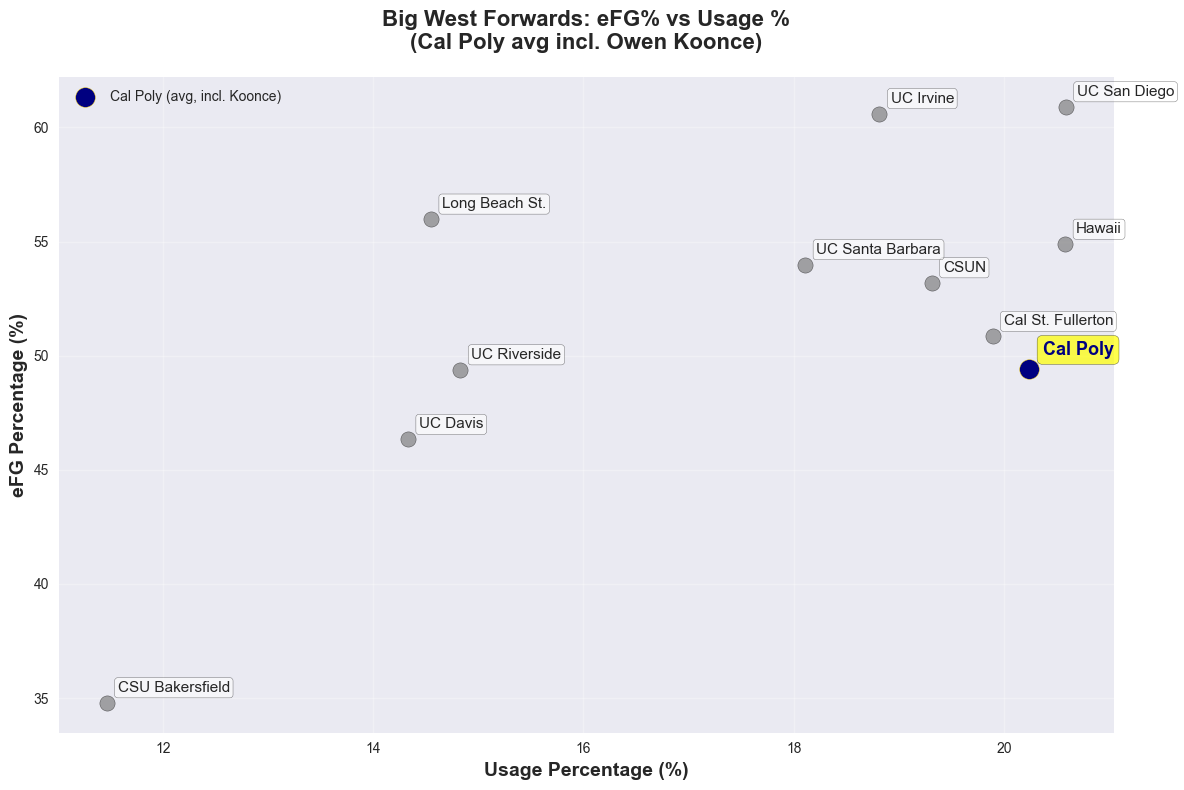

Big West Forwards eFG% vs Usage % (Cal Poly avg incl. Koonce):
Team                     eFG%   Usage%
--------------------------------------
Cal Poly                49.43    20.24
UC Davis                46.33    14.33
UC Riverside            49.38    14.83
CSU Bakersfield         34.79    11.46
Long Beach St.          55.98    14.55
UC San Diego            60.90    20.59
UC Irvine               60.60    18.82
CSUN                    53.19    19.31
UC Santa Barbara        53.98    18.11
Cal St. Fullerton       50.85    19.89
Hawaii                  54.88    20.58


In [10]:
# Data visual: Big West Forwards eFG% vs Usage %
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load new CSV if needed
csv_path = '/Users/yashwant/Downloads/cbb-data-1758387249883.csv'
df_new = pd.read_csv(csv_path)

# Ensure correct scaling for eFG% and usage%
if df_new['efgPct'].max() <= 1.0:
    df_new['efgPct'] = df_new['efgPct'] * 100
if df_new['usagePct'].max() <= 1.0:
    df_new['usagePct'] = df_new['usagePct'] * 100

# Identify Owen Koonce (include him as a forward for Cal Poly)
koonce_mask = (df_new['fullName'].str.contains('Owen Koonce', case=False, na=False))

# Forwards: position == 'F' OR Owen Koonce
forwards_mask = (df_new['position'] == 'F') | koonce_mask

# Big West teams
big_west_teams = df_new['teamMarket'].unique()

# Cal Poly forwards (including Owen Koonce)
cal_poly_mask = (df_new['teamMarket'].str.contains('Cal Poly', case=False, na=False))
cal_poly_forwards = df_new[forwards_mask & cal_poly_mask]
cal_poly_efg = cal_poly_forwards['efgPct'].mean()
cal_poly_usage = cal_poly_forwards['usagePct'].mean()

# Prepare data for other teams
other_teams = [team for team in big_west_teams if team.lower() != 'cal poly']
team_points = []
for team in other_teams:
    team_mask = (df_new['teamMarket'] == team)
    team_forwards = df_new[forwards_mask & team_mask]
    if len(team_forwards) > 0:
        avg_efg = team_forwards['efgPct'].mean()
        avg_usage = team_forwards['usagePct'].mean()
        team_points.append({'team': team, 'efgPct': avg_efg, 'usagePct': avg_usage})

# Plot
plt.figure(figsize=(12, 8))
# Plot Cal Poly average
plt.scatter(cal_poly_usage, cal_poly_efg, s=200, c='navy', edgecolors='gold', label='Cal Poly (avg, incl. Koonce)', zorder=5)
plt.annotate('Cal Poly', (cal_poly_usage, cal_poly_efg), fontsize=13, fontweight='bold', color='navy', xytext=(10,10), textcoords='offset points', bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
# Plot other teams
for pt in team_points:
    plt.scatter(pt['usagePct'], pt['efgPct'], s=120, c='gray', edgecolors='black', alpha=0.7)
    plt.annotate(pt['team'], (pt['usagePct'], pt['efgPct']), fontsize=11, xytext=(8,8), textcoords='offset points', bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.6))
plt.xlabel('Usage Percentage (%)', fontsize=14, fontweight='bold')
plt.ylabel('eFG Percentage (%)', fontsize=14, fontweight='bold')
plt.title('Big West Forwards: eFG% vs Usage %\n(Cal Poly avg incl. Owen Koonce)', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Print summary table
print('Big West Forwards eFG% vs Usage % (Cal Poly avg incl. Koonce):')
print(f"{'Team':<20} {'eFG%':>8} {'Usage%':>8}")
print('-'*38)
print(f"{'Cal Poly':<20} {cal_poly_efg:8.2f} {cal_poly_usage:8.2f}")
for pt in team_points:
    print(f"{pt['team']:<20} {pt['efgPct']:8.2f} {pt['usagePct']:8.2f}")

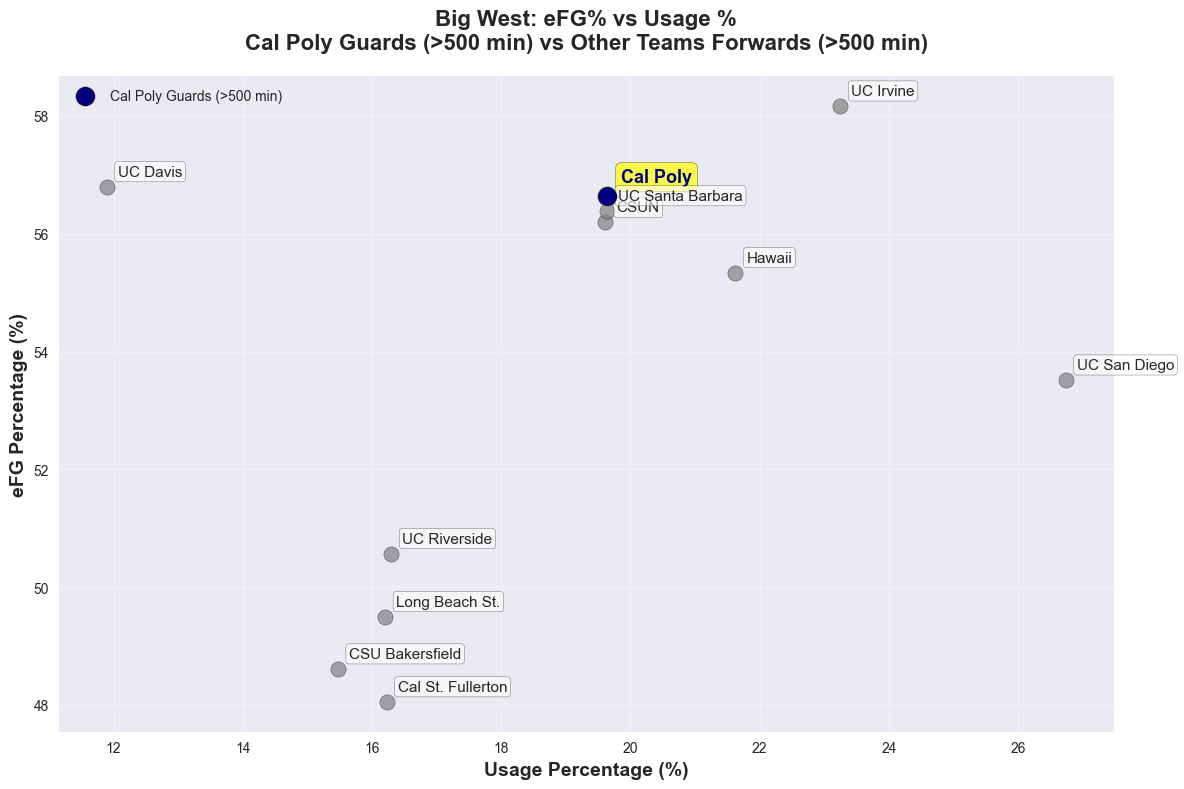

Big West eFG% vs Usage % (Cal Poly guards >500 min, other teams forwards >500 min):
Team                     eFG%   Usage%
--------------------------------------
Cal Poly                56.64    19.64
UC Davis                56.80    11.89
UC Riverside            50.57    16.30
CSU Bakersfield         48.61    15.47
Long Beach St.          49.50    16.20
UC San Diego            53.52    26.74
UC Irvine               58.17    23.25
CSUN                    56.19    19.61
UC Santa Barbara        56.39    19.64
Cal St. Fullerton       48.05    16.23
Hawaii                  55.34    21.62


In [11]:
# Data visual: Big West eFG% vs Usage %
# Cal Poly: only guards with >500 minutes
# Other teams: only forwards with >500 minutes
csv_path = '/Users/yashwant/Downloads/cbb-data-1758387249883.csv'
df_new = pd.read_csv(csv_path)

# Ensure correct scaling for eFG% and usage%
if df_new['efgPct'].max() <= 1.0:
    df_new['efgPct'] = df_new['efgPct'] * 100
if df_new['usagePct'].max() <= 1.0:
    df_new['usagePct'] = df_new['usagePct'] * 100

# Cal Poly guards with >500 minutes
cal_poly_mask = (df_new['teamMarket'].str.contains('Cal Poly', case=False, na=False))
cal_poly_guards = df_new[(cal_poly_mask) & (df_new['position'] == 'G') & (df_new['minsPbp'] > 500)]
cal_poly_efg = cal_poly_guards['efgPct'].mean()
cal_poly_usage = cal_poly_guards['usagePct'].mean()

# Prepare data for other teams: forwards with >500 minutes
big_west_teams = df_new['teamMarket'].unique()
other_teams = [team for team in big_west_teams if team.lower() != 'cal poly']
team_points = []
for team in other_teams:
    team_mask = (df_new['teamMarket'] == team)
    team_forwards = df_new[(team_mask) & (df_new['position'] == 'F') & (df_new['minsPbp'] > 500)]
    if len(team_forwards) > 0:
        avg_efg = team_forwards['efgPct'].mean()
        avg_usage = team_forwards['usagePct'].mean()
        team_points.append({'team': team, 'efgPct': avg_efg, 'usagePct': avg_usage})

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(cal_poly_usage, cal_poly_efg, s=200, c='navy', edgecolors='gold', label='Cal Poly Guards (>500 min)', zorder=5)
plt.annotate('Cal Poly', (cal_poly_usage, cal_poly_efg), fontsize=13, fontweight='bold', color='navy', xytext=(10,10), textcoords='offset points', bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
for pt in team_points:
    plt.scatter(pt['usagePct'], pt['efgPct'], s=120, c='gray', edgecolors='black', alpha=0.7)
    plt.annotate(pt['team'], (pt['usagePct'], pt['efgPct']), fontsize=11, xytext=(8,8), textcoords='offset points', bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.6))
plt.xlabel('Usage Percentage (%)', fontsize=14, fontweight='bold')
plt.ylabel('eFG Percentage (%)', fontsize=14, fontweight='bold')
plt.title('Big West: eFG% vs Usage %\nCal Poly Guards (>500 min) vs Other Teams Forwards (>500 min)', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Print summary table
print('Big West eFG% vs Usage % (Cal Poly guards >500 min, other teams forwards >500 min):')
print(f"{'Team':<20} {'eFG%':>8} {'Usage%':>8}")
print('-'*38)
print(f"{'Cal Poly':<20} {cal_poly_efg:8.2f} {cal_poly_usage:8.2f}")
for pt in team_points:
    print(f"{pt['team']:<20} {pt['efgPct']:8.2f} {pt['usagePct']:8.2f}")

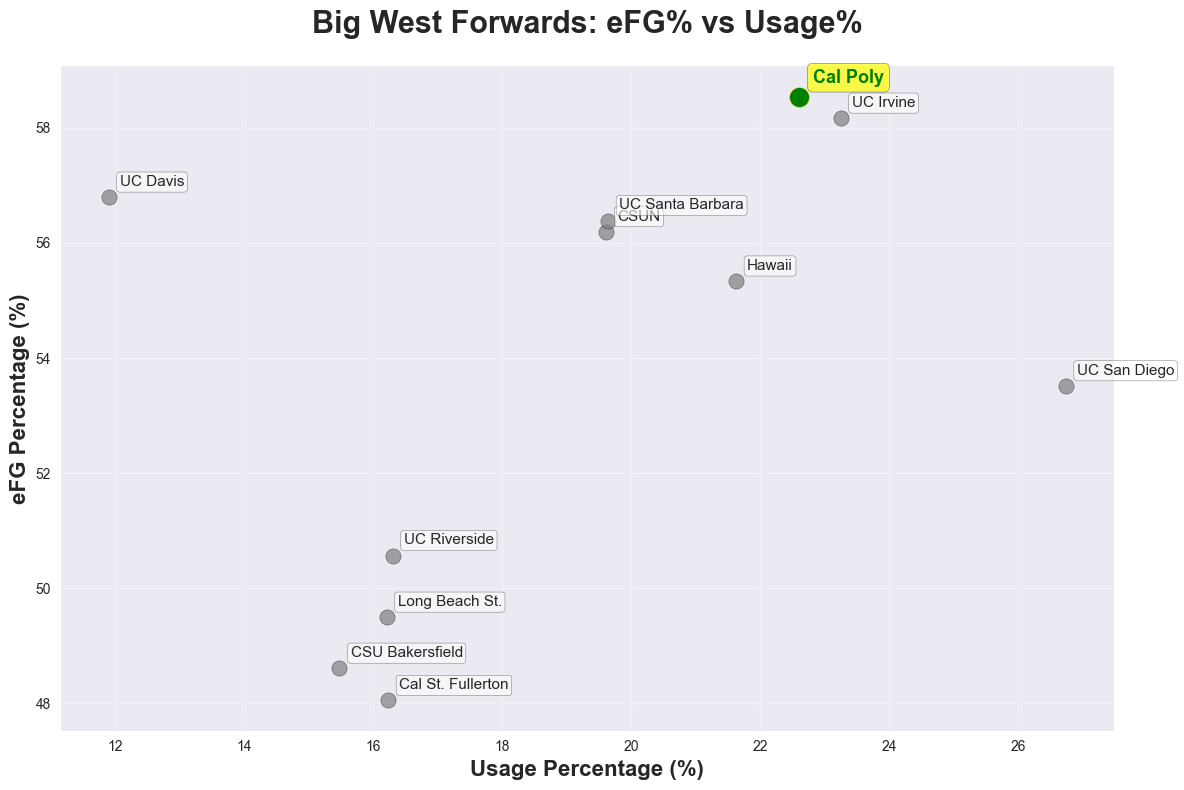

Big West eFG% vs Usage %:
Team                     eFG%   Usage%
--------------------------------------
Cal Poly                58.54    22.60
UC Davis                56.80    11.89
UC Riverside            50.57    16.30
CSU Bakersfield         48.61    15.47
Long Beach St.          49.50    16.20
UC San Diego            53.52    26.74
UC Irvine               58.17    23.25
CSUN                    56.19    19.61
UC Santa Barbara        56.39    19.64
Cal St. Fullerton       48.05    16.23
Hawaii                  55.34    21.62


In [16]:
# Data visual: Big West eFG% vs Usage %
csv_path = '/Users/yashwant/Downloads/cbb-data-1758387249883.csv'
df_new = pd.read_csv(csv_path)

# Ensure correct scaling for eFG% and usage%
if df_new['efgPct'].max() <= 1.0:
    df_new['efgPct'] = df_new['efgPct'] * 100
if df_new['usagePct'].max() <= 1.0:
    df_new['usagePct'] = df_new['usagePct'] * 100

# Cal Poly: only Owen Koonce and Mac Riniker
cal_poly_mask = (df_new['teamMarket'].str.contains('Cal Poly', case=False, na=False))
koonce_mask = df_new['fullName'].str.contains('Owen Koonce', case=False, na=False)
riniker_mask = df_new['fullName'].str.contains('Mac Riniker', case=False, na=False)
cal_poly_players = df_new[cal_poly_mask & (koonce_mask | riniker_mask)]
cal_poly_efg = cal_poly_players['efgPct'].mean()
cal_poly_usage = cal_poly_players['usagePct'].mean()

# Prepare data for other teams: forwards with >500 minutes
big_west_teams = df_new['teamMarket'].unique()
other_teams = [team for team in big_west_teams if team.lower() != 'cal poly']
team_points = []
for team in other_teams:
    team_mask = (df_new['teamMarket'] == team)
    team_forwards = df_new[(team_mask) & (df_new['position'] == 'F') & (df_new['minsPbp'] > 500)]
    if len(team_forwards) > 0:
        avg_efg = team_forwards['efgPct'].mean()
        avg_usage = team_forwards['usagePct'].mean()
        team_points.append({'team': team, 'efgPct': avg_efg, 'usagePct': avg_usage})

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(cal_poly_usage, cal_poly_efg, s=200, c='green', edgecolors='gold', zorder=5)
plt.annotate('Cal Poly', (cal_poly_usage, cal_poly_efg), fontsize=13, fontweight='bold', color='green', xytext=(10,10), textcoords='offset points', bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
for pt in team_points:
    plt.scatter(pt['usagePct'], pt['efgPct'], s=120, c='gray', edgecolors='black', alpha=0.7)
    plt.annotate(pt['team'], (pt['usagePct'], pt['efgPct']), fontsize=11, xytext=(8,8), textcoords='offset points', bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.6))
plt.xlabel('Usage Percentage (%)', fontsize=16, fontweight='bold')
plt.ylabel('eFG Percentage (%)', fontsize=16, fontweight='bold')
plt.title('Big West Forwards: eFG% vs Usage%', fontsize=22, fontweight='bold', pad=24)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary table
print('Big West eFG% vs Usage %:')
print(f"{'Team':<20} {'eFG%':>8} {'Usage%':>8}")
print('-'*38)
print(f"{'Cal Poly':<20} {cal_poly_efg:8.2f} {cal_poly_usage:8.2f}")
for pt in team_points:
    print(f"{pt['team']:<20} {pt['efgPct']:8.2f} {pt['usagePct']:8.2f}")